In [4]:
import pandas as pd
import yfinance as yahoo
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [50]:
start, end = dt.date(2018,8,1), dt.date(2021,1,1)

stocks = ['AAPL.BA', 'BBD.BA', 'MELI.BA', 'KO.BA', 'INTC.BA', 'VALE.BA',
       'TSLA.BA', 'WFC.BA', 'XOM.BA', 'AMZN.BA', 'BABA.BA', 'T.BA', 'MSFT.BA',
       'GE.BA', 'WMT.BA', 'HMY.BA', 'PFE.BA', 'ERJ.BA', 'AUY.BA', 'X.BA']

ratios = [10,144,1,9,1,1,1,1,5,5,60,10,2,3,15,2,5,6,3,5]
#cedears = yahoo.download(stocks, period="240d", interval="60m")['Adj Close'].fillna(method='ffill')
cedears = yahoo.download(stocks, start=start, end=end)['Adj Close'].fillna(method='ffill')

cedears = cedears * ratios  # get stocks prices according to what you have to paid

topba = [s.replace('.BA', 'BA') for s in stocks]

cedears.columns = topba

forex = [i.replace('.BA','') for i in stocks]

df = yahoo.download(forex,start=start, end=end)['Adj Close'].fillna(method='ffill')

mervalba = ['ARS=X', 'BMA', 'BMA.BA', 'CEPU', 'CEPU.BA', 'CRES.BA', 'CRESY', 'EDN', 'EDN.BA',
            'GGAL', 'GGAL.BA', 'IRS', 'IRSA.BA', 'LOMA', 'LOMA.BA', 'PAM', 'PAMP.BA',
            'SUPV', 'SUPV.BA', 'TECO2.BA', 'TEO', 'TGS', 'TGSU2.BA', 'YPF',
            'YPFD.BA']

#merval = yahoo.download(tickers=mervalba, period="240d", interval="60m")['Adj Close'].fillna(method='ffill')
merval = yahoo.download(tickers=mervalba, start=start, end=end)['Adj Close'].fillna(method='ffill')

top = list(merval.columns)
topmerval = [t.replace('.BA', 'BA') for t in top]

merval.columns = topmerval

cable = pd.DataFrame(data=None)

cable['BMA'] = (merval.BMABA / merval.BMA) * 10
cable['CEPU'] = (merval.CEPUBA / merval.CEPU) * 10
cable['CRES'] = (merval.CRESBA / merval.CRESY) * 10
cable['EDN'] = (merval.EDNBA / merval.EDN) * 20
cable['GGAL'] = (merval.GGALBA / merval.GGAL) * 10
cable['IRSA'] = (merval.IRSABA / merval.IRS) * 10
cable['LOMA'] = (merval.LOMABA / merval.LOMA) * 5
cable['PAMP'] = (merval.PAMPBA / merval.PAM) * 25
cable['SUPV'] = (merval.SUPVBA / merval.SUPV) * 5
cable['TECO2'] = (merval.TECO2BA / merval.TEO) * 5
cable['TGSU2'] = (merval.TGSU2BA / merval.TGS) * 5
cable['YPF'] = (merval.YPFDBA / merval.YPF)

mediacable = pd.DataFrame(index=cable.index)
mediacable['CableAdrs'] = cable.T.median()

df = df.tail(len(cedears))

tc = cedears.div(df.values)
tc.columns = topba

mediaced = pd.DataFrame(index=tc.index)
mediaced['CableCedears'] = tc.T.median()

dolar = pd.DataFrame(index=merval.index)
dolar['Oficial'] = merval.iloc[:, 0]


[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  25 of 25 completed


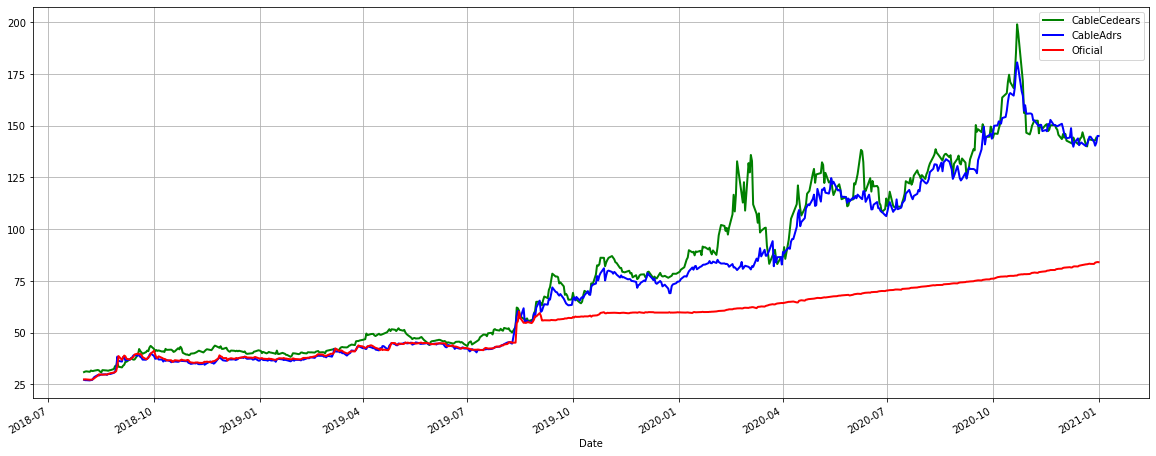

In [51]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(111)
mediaced.fillna(method='ffill').plot(ax=ax1, color='g', lw=2., legend=True)
mediacable.fillna(method='ffill').plot(ax=ax1, color='b', lw=2., legend=True)
dolar.plot(ax=ax1, color='r', lw=2., legend=True)
ax1.grid()
plt.show()


In [58]:
dolar.index[555]

Timestamp('2020-09-16 00:00:00', freq='B')

In [59]:
dolar['ImpuestoPais'] = dolar['Oficial'].values
dolar['ImpuestoPais'].iloc[363:] = dolar['ImpuestoPais'] * 1.30 # 23/12/2019
dolar['Solidario+30+35'] = dolar['ImpuestoPais'].values
dolar['Solidario+30+35'].iloc[555:] = dolar['ImpuestoPais'] * 1.35 # 15/09/2020
dolar

,Oficial,ImpuestoPais,Solidario+30+35
Date,,,
2018-08-01,27.417999,27.417999,27.417999
2018-08-02,27.496000,27.496000,27.496000
2018-08-03,27.437500,27.437500,27.437500
2018-08-06,27.299999,27.299999,27.299999
2018-08-07,27.299000,27.299000,27.299000
...,...,...,...
2020-12-28,83.226601,108.194581,146.062684
2020-12-29,83.831596,108.981075,147.124452
2020-12-30,84.021599,109.228078,147.457906


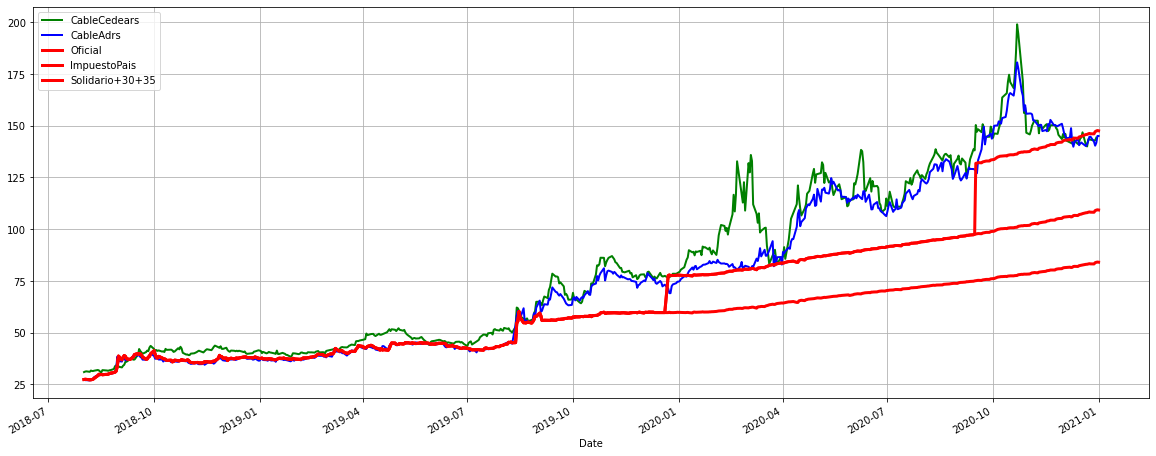

In [60]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(111)
mediaced.fillna(method='ffill').plot(ax=ax1, color='g', lw=2., legend=True)
mediacable.fillna(method='ffill').plot(ax=ax1, color='b', lw=2., legend=True)
dolar.plot(ax=ax1, color='r', lw=3., legend=True)
ax1.grid()
plt.show()
